In [1]:
import pandas as pd
import matplotlib
import csv
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Train and Test Data 
cards = '/Users/ceo/Desktop/'
cardsdf=  pd.read_csv(cards + 'creditcard.csv') 
cardsdf.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
cardsdf = cardsdf.reindex(sorted(cardsdf.columns), axis=1) #sorting data alphabetically
print(cardsdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Amount  284807 non-null  float64
 1   Class   284807 non-null  int64  
 2   Time    284807 non-null  float64
 3   V1      284807 non-null  float64
 4   V10     284807 non-null  float64
 5   V11     284807 non-null  float64
 6   V12     284807 non-null  float64
 7   V13     284807 non-null  float64
 8   V14     284807 non-null  float64
 9   V15     284807 non-null  float64
 10  V16     284807 non-null  float64
 11  V17     284807 non-null  float64
 12  V18     284807 non-null  float64
 13  V19     284807 non-null  float64
 14  V2      284807 non-null  float64
 15  V20     284807 non-null  float64
 16  V21     284807 non-null  float64
 17  V22     284807 non-null  float64
 18  V23     284807 non-null  float64
 19  V24     284807 non-null  float64
 20  V25     284807 non-null  float64
 21  V26     28

In [6]:
print(cardsdf.columns)

Index(['Amount', 'Class', 'Time', 'V1', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V19', 'V2', 'V20', 'V21', 'V22', 'V23',
       'V24', 'V25', 'V26', 'V27', 'V28', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9'],
      dtype='object')


In [7]:
display(cardsdf.isnull().sum())

Amount    0
Class     0
Time      0
V1        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V2        0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
dtype: int64

In [8]:
print(cardsdf.shape) 

(284807, 31)


In [12]:
cardsdf.duplicated() 

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [13]:
# testing with assert statement if I have null values
assert pd.notnull(cardsdf).all().all() 

In [9]:
cardsdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,284807.0,8.834962e+01,250.120109,0.000000,5.600000,22.000000,77.165000,25691.160000
Class,284807.0,1.727486e-03,0.041527,0.000000,0.000000,0.000000,0.000000,1.000000
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V10,284807.0,1.768627e-15,1.088850,-24.588262,-0.535426,-0.092917,0.453923,23.745136
V11,284807.0,9.170318e-16,1.020713,-4.797473,-0.762494,-0.032757,0.739593,12.018913
V12,284807.0,-1.810658e-15,0.999201,-18.683715,-0.405571,0.140033,0.618238,7.848392
V13,284807.0,1.693438e-15,0.995274,-5.791881,-0.648539,-0.013568,0.662505,7.126883
V14,284807.0,1.479045e-15,0.958596,-19.214325,-0.425574,0.050601,0.493150,10.526766
V15,284807.0,3.482336e-15,0.915316,-4.498945,-0.582884,0.048072,0.648821,8.877742


(array([284315.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

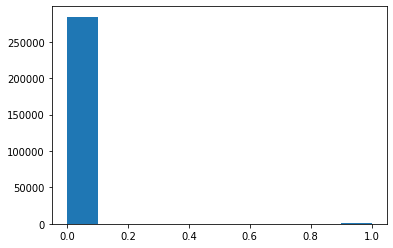

In [10]:
plt.hist(cardsdf.Class)

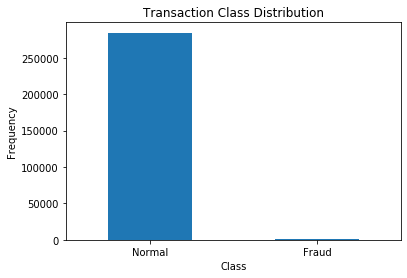

In [4]:
labels =['Normal','Fraud']
count_classes = pd.value_counts(cardsdf['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [4]:
Fraud = cardsdf[cardsdf['Class']==1]

Normal = cardsdf[cardsdf['Class']==0]

In [5]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [6]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

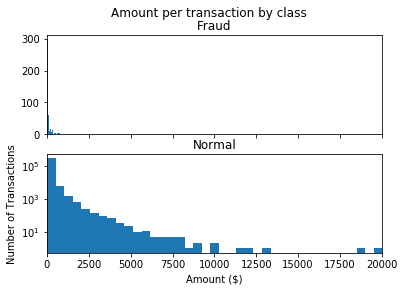

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [5]:
Fraud = cardsdf[cardsdf['Class']==1]
Valid = cardsdf[cardsdf['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

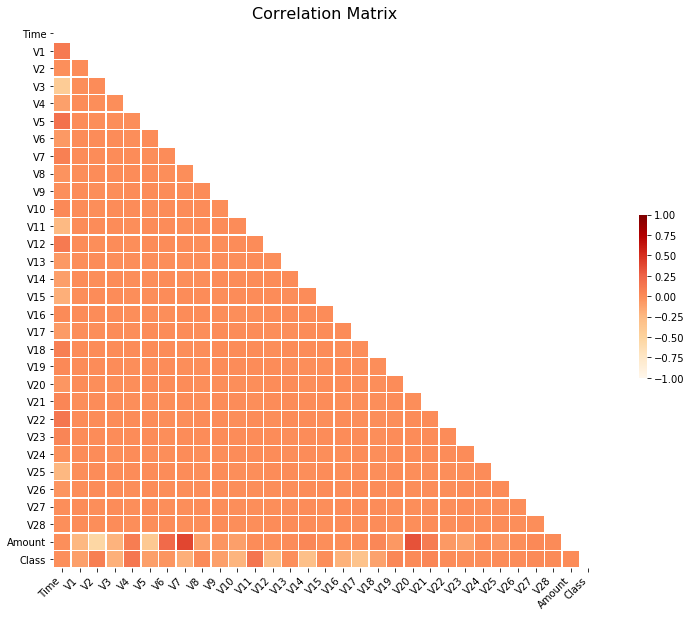

In [15]:
plt.figure(figsize=(15,10))

corr = cardsdf.corr()
#plt.rcParams["figure.figsize"] = (10,10)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(

    corr, 

    vmin=-1, vmax=1, center=0,
cmap='OrRd',
    #cmap=sns.diverging_palette(250, 15, s=75, l=40,
   #         n=9, center="dark"),
mask=mask, 
square=True,    
linewidths=.3,
cbar_kws={"shrink": .3}, 
  
)

ax.set_xticklabels(

    ax.get_xticklabels(),

    rotation=45,

    horizontalalignment='right'

);


plt.title('Correlation Matrix', fontsize=16);

Text(0.5, 0, 'Sale Prices')

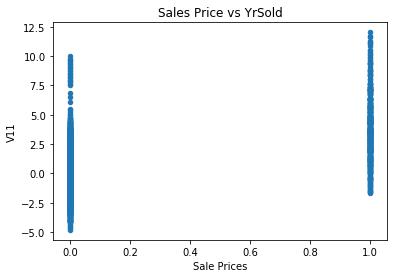

In [13]:
cardsdf.plot.scatter(x='Class',

                     y='V11'                     

                    ) ;plt.title('Sales Price vs YrSold');plt.xlabel('Sale Prices')

                     

Text(0.5, 0, 'Sale Prices')

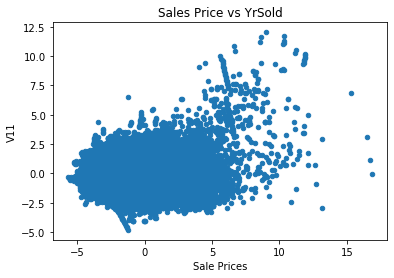

In [14]:
cardsdf.plot.scatter(x='V4',

                     y='V11'                     

                    ) ;plt.title('Sales Price vs YrSold');plt.xlabel('Sale Prices')

                     

Text(0.5, 0, 'Sale Prices')

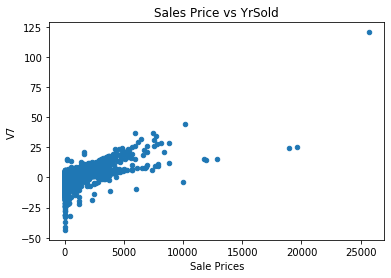

In [17]:
cardsdf.plot.scatter(x='Amount',

                     y='V7'                     

                    ) ;plt.title('Sales Price vs YrSold');plt.xlabel('Sale Prices')

In [ ]:
plt.figure()
sns.countplot(x='Class', hue='V4', data=cardsdf, palette='RdBu')

plt.show()

In [ ]:
plot = sns.boxplot(y='V11', x='V4', 
                 data=cardsdf, 
                 width=0.5,
                 palette="colorblind")

# Testing a hypothesis

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import cross_val_score
from statistics import mean 
columns = cardsdf.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = cardsdf[columns]
Y = cardsdf[target]
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
n_outliers = len(Fraud)


anomalydetector = LocalOutlierFactor(n_neighbors=2,novelty=True)
anomalydetector.fit(X)

# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y, metric):
        scores = cross_val_score(anomalydetector, X, Y, scoring=metric, cv=10, n_jobs=-1)
        return scores
anomalydetector.negative_outlier_factor_
y_pred = anomalydetector.predict(X)
    # Run Classification Metrics

 
scores = evaluate_model(X, y_pred, 'accuracy')
# report score
print('Accuracy: %.3f%%' % (mean(scores) * 100))

Accuracy: 0.000%


In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
columns = cardsdf.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = cardsdf[columns]
Y = cardsdf[target]

# Define a random state 
state = np.random.RandomState(42)
n_outliers = len(Fraud)

#        clf.fit(X)
#        scores_prediction = clf.decision_function(X)
 #       y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    #y_pred[y_pred == 1] = 0
    #y_pred[y_pred == -1] = 1
    #n_errors = (y_pred != Y).sum()
    
clf = IsolationForest(n_estimators=1000, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0).fit(X)
scores_prediction = clf.decision_ function(X)
y_pred = clf.predict(X)
    # Run Classification Metrics

print("Accuracy Score :")
print(accuracy_score(Y,y_pred))
print("Classification Report :")
print(classification_report(Y,y_pred))

Accuracy Score :
0.0011727239850144132
Classification Report :


C:\Users\ceo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ceo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00    284315
           1       0.00      0.68      0.00       492

    accuracy                           0.00    284807
   macro avg       0.00      0.23      0.00    284807
weighted avg       0.00      0.00      0.00    284807



In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, y_pred)

array([[     0,      0,      0],
       [   342,      0, 283973],
       [   151,      0,    341]], dtype=int64)

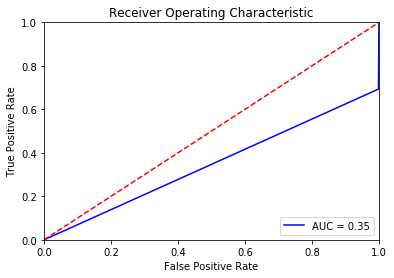

In [19]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y, y_pred)
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#probs = clf.predict_proba(X)
#preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from autoencoder_tensorflow import Autoencoder
# Tensorflow implementation
autoencodertf = Autoencoder(X)
autoencodertf.train(X)
encoded_img = autoencodertf.getEncodedImage(x_test[1])
decoded_img = autoencodertf.getDecodedImage(x_test[1])

# Tensorflow implementation results
plt.figure(figsize=(20, 4))
subplot = plt.subplot(2, 10, 1)
plt.imshow(x_test[1].reshape(28, 28))
plt.gray()
subplot.get_xaxis().set_visible(False)
subplot.get_yaxis().set_visible(False)

subplot = plt.subplot(2, 10, 2)
plt.imshow(decoded_img.reshape(28, 28))
plt.gray()
subplot.get_xaxis().set_visible(False)
subplot.get_yaxis().set_visible(False)

In [ ]:
import tensorflow.keras as keras
rom tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
LATENT_SIZE = 32
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE),
    LR()
])
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])
EPOCHS = 60
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4)
    rand = X[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    
    
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(y, y_train)

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

target = to_categorical(df.survived)
n_cols = predictors.shape[1]
model = Sequential()
# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)
# Fit the model
model.fit(predictors, target)
# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)